Імпорт бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

# Визначаємо рівняння:
\begin{align*}
-10.2x_1 + 9.3x_2 &= 73 \\
5.3x_1 + 15.8x_2 &= 173 \\
17.2x_1 + 10.3x_2 &= 159
\end{align*}

Створимо функції для кожної прямої

In [3]:
x = np.linspace(-10, 20, 400)

y1 = (73 + 10.2 * x) / 9.3
y2 = (173 - 5.3 * x) / 15.8
y3 = (159 - 17.2 * x) / 10.3

Побудуємо кожну пряму окремо

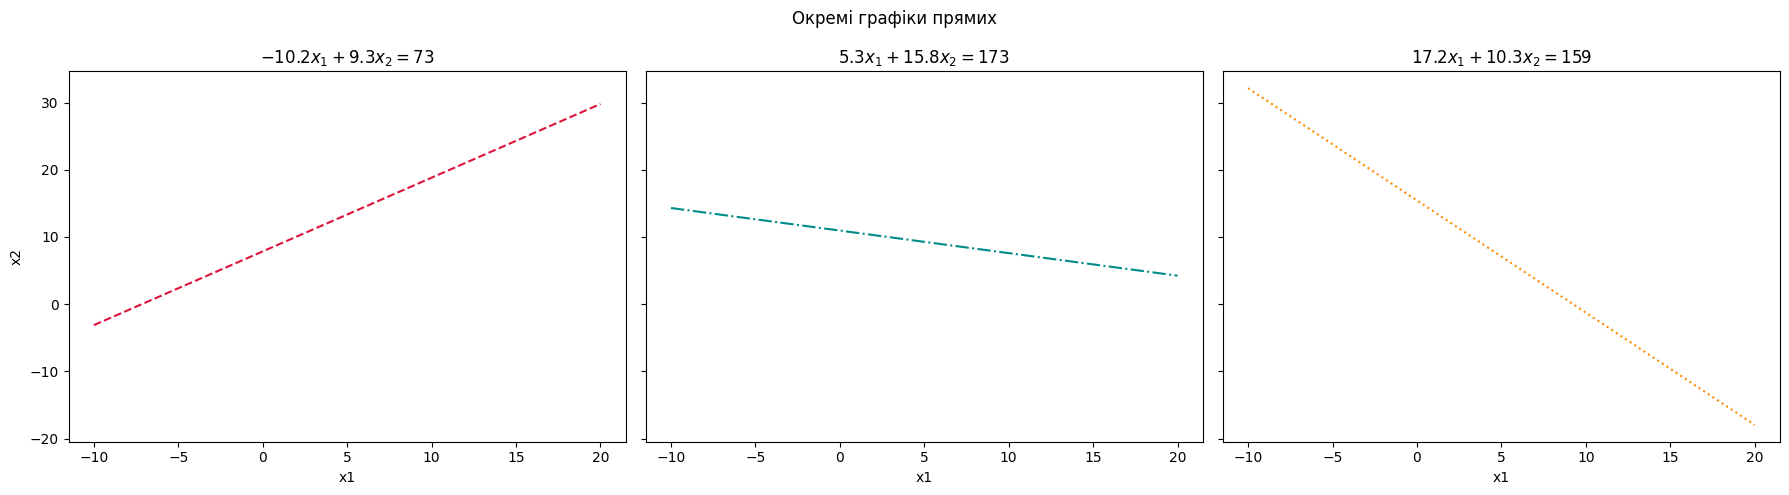

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axs[0].plot(x, y1, color='crimson', linestyle='--')
axs[0].set_title(r'$-10.2x_1 + 9.3x_2 = 73$')

axs[1].plot(x, y2, color='darkcyan', linestyle='-.')
axs[1].set_title(r'$5.3x_1 + 15.8x_2 = 173$')

axs[2].plot(x, y3, color='darkorange', linestyle=':')
axs[2].set_title(r'$17.2x_1 + 10.3x_2 = 159$')

for ax in axs:
    ax.set_xlabel('x1')
axs[0].set_ylabel('x2')

fig.suptitle('Окремі графіки прямих')
fig.tight_layout()
plt.show()

Побудуємо всі прямі на одному графіку

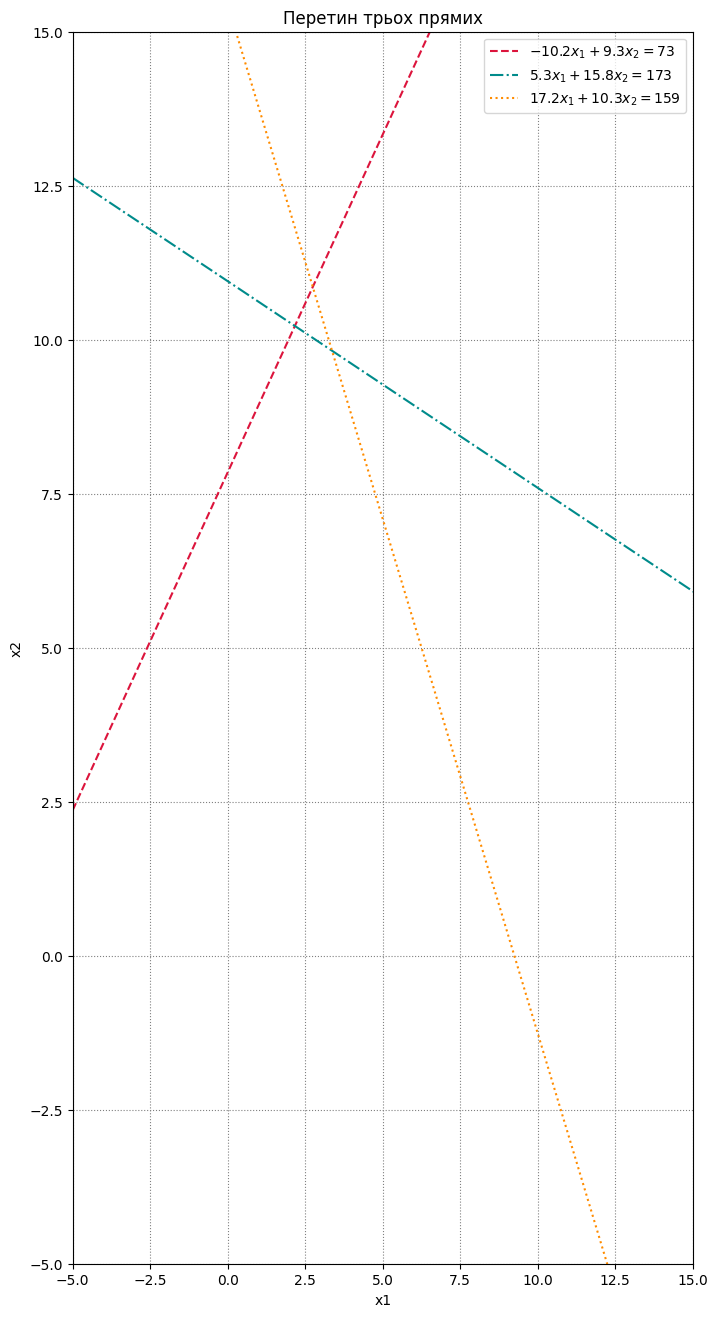

In [5]:
fig, ax = plt.subplots(figsize=(8, 16), dpi=100)

ax.plot(x, y1, label=r'$-10.2x_1 + 9.3x_2 = 73$', color='crimson', linestyle='--')
ax.plot(x, y2, label=r'$5.3x_1 + 15.8x_2 = 173$', color='darkcyan', linestyle='-.')
ax.plot(x, y3, label=r'$17.2x_1 + 10.3x_2 = 159$', color='darkorange', linestyle=':')

ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)

ax.grid(color='gray', linestyle=':', linewidth=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Перетин трьох прямих')
ax.legend()

Знаходимо точки перетину

In [6]:
A1 = np.array([[-10.2, 9.3], [5.3, 15.8]])
B1 = np.array([73, 173])
point12 = solve(A1, B1)

A2 = np.array([[-10.2, 9.3], [17.2, 10.3]])
B2 = np.array([73, 159])
point13 = solve(A2, B2)

A3 = np.array([[5.3, 15.8], [17.2, 10.3]])
B3 = np.array([173, 159])
point23 = solve(A3, B3)

Відмічаємо точки перетину

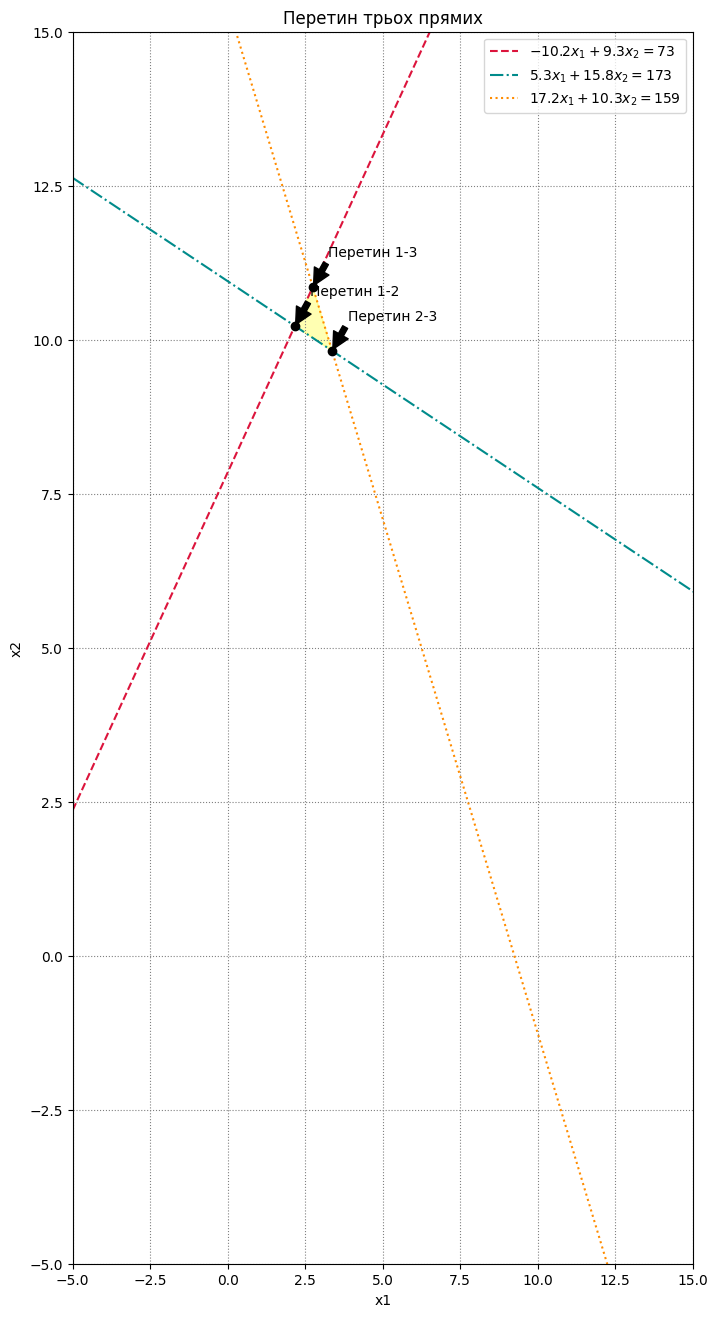

In [14]:
fig, ax = plt.subplots(figsize=(8, 16), dpi=100)

ax.plot(x, y1, label=r'$-10.2x_1 + 9.3x_2 = 73$', color='crimson', linestyle='--')
ax.plot(x, y2, label=r'$5.3x_1 + 15.8x_2 = 173$', color='darkcyan', linestyle='-.')
ax.plot(x, y3, label=r'$17.2x_1 + 10.3x_2 = 159$', color='darkorange', linestyle=':')

ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)

ax.grid(color='gray', linestyle=':', linewidth=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Перетин трьох прямих')
ax.legend()

ax.plot(*point12, 'o', color='black')
ax.plot(*point13, 'o', color='black')
ax.plot(*point23, 'o', color='black')

ax.annotate('Перетин 1-2', xy=point12, xytext=(point12[0]+0.5, point12[1]+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Перетин 1-3', xy=point13, xytext=(point13[0]+0.5, point13[1]+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Перетин 2-3', xy=point23, xytext=(point23[0]+0.5, point23[1]+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Заповнюємо спільну область
x_fill = np.linspace(max(min(point12[0], point13[0], point23[0])-1, -5),
                     min(max(point12[0], point13[0], point23[0])+1, 15), 400)

# Визначимо мінімальні та максимальні обмеження для заповнення
fill_min = np.maximum(np.maximum((73 + 10.2*x_fill)/9.3, (173 - 5.3*x_fill)/15.8), (159 - 17.2*x_fill)/10.3)
fill_max = np.minimum(np.minimum((73 + 10.2*x_fill)/9.3, (173 - 5.3*x_fill)/15.8), (159 - 17.2*x_fill)/10.3)

ax.fill_between(x_fill, fill_min, fill_max, where=fill_max>=fill_min, color='yellow', alpha=0.3)

# Малюємо трикутник між точками перетину
polygon_x = [point12[0], point13[0], point23[0]]
polygon_y = [point12[1], point13[1], point23[1]]

ax.fill(polygon_x, polygon_y, color='yellow', alpha=0.3)

plt.show()